In [1]:
import pickle

with open('synth.pickle', 'rb') as f:
    r = pickle.load(f)

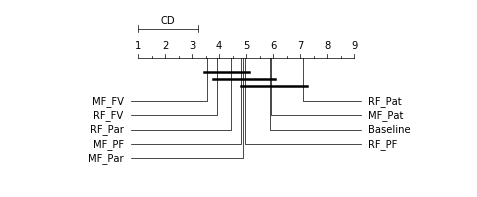

In [2]:
import Orange
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import rankdata
names = ["Baseline",
         "MF_FV","RF_FV","MF_PF","RF_PF",
         "MF_Par","RF_Par","MF_Pat","RF_Pat"]
ranks = np.zeros((len(names), len(r)))
for i, res in enumerate(r):
    pred = []
    for name in names:
        pred.append(res[name])
    ranks[:,i] = (len(names)+1)-rankdata(pred, method="min")
avranks = np.mean(ranks, axis=1)

cd = Orange.evaluation.compute_CD(avranks, len(r), alpha='0.1')
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6, textspace=1.5)
plt.show()